# Image Classification using CNN - No Regularization & No BN


In this notebook, we perform classification of the MNIST Fashion dataset without any **regularization**. Also we don't apply batch normalization (BN).


### CNN Architecture

We build a 4-hidden layer CNN model:
- 3 Convolutional layers and 1 Fully-Connected (dense) layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

## Load & Preprocess Data

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


# Split the training set into training & validation subsets
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]


# The data must be a 4D tensor: sample size, height, width, channels
# Add a single channel for the grayscale images (for RGB images this step is not required)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


# Convert datatype to float32
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')


# Scale the data
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0


# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)


print("\nShape of Training Samples: ", X_train.shape)
print("Shape of Training Labels: ", y_train.shape)

print("\nShape of Validation Samples: ", X_valid.shape)
print("Shape of Validation Labels: ", y_valid.shape)

print("\nShape of Testing Samples: ", X_test.shape)
print("Shape of Testing Labels: ", y_test.shape)

print("\nData type: ", X_train.dtype)
print("Label type: ", y_train.dtype)


Shape of Training Samples:  (55000, 28, 28, 1)
Shape of Training Labels:  (55000, 10)

Shape of Validation Samples:  (5000, 28, 28, 1)
Shape of Validation Labels:  (5000, 10)

Shape of Testing Samples:  (10000, 28, 28, 1)
Shape of Testing Labels:  (10000, 10)

Data type:  float32
Label type:  float32


## Create the CNN Model

We apply the batch normalization (BN) layer before activation. There is no need to use bias neurons in the Convolutional layers (set the use_bias to False). Because the Conv layer is followed by a BN layer that adds a bias. The BN "shift" parameter shifts the output of the layer (thus acts like a bias). 

In [3]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
'''
initializer = 'he_normal'
activation_func = 'relu'


model = Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer=initializer, padding='same', use_bias=False, 
                 input_shape=(28, 28, 1)))
model.add(Activation(activation_func))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer=initializer, padding='same', use_bias=False))
model.add(Activation(activation_func))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer=initializer, padding='same', use_bias=False))
model.add(Activation(activation_func))
model.add(Flatten())

model.add(Dense(128, kernel_initializer=initializer))
model.add(Activation(activation_func))
model.add(Dense(10, activation='softmax'))


'''
Compile the model
'''
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        288       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18432     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          3

## Train the Model

In [4]:
%%time

no_of_epochs = 20
size_of_mini_batch = 128

history = model.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
430/430 [==============================] - 27s 62ms/step - loss: 0.4314 - accuracy: 0.8460 - val_loss: 0.2890 - val_accuracy: 0.8988
Epoch 2/20
430/430 [==============================] - 27s 63ms/step - loss: 0.2765 - accuracy: 0.9005 - val_loss: 0.2566 - val_accuracy: 0.9078
Epoch 3/20
430/430 [==============================] - 27s 64ms/step - loss: 0.2291 - accuracy: 0.9170 - val_loss: 0.2542 - val_accuracy: 0.9070
Epoch 4/20
430/430 [==============================] - 28s 65ms/step - loss: 0.1974 - accuracy: 0.9276 - val_loss: 0.2316 - val_accuracy: 0.9164
Epoch 5/20
430/430 [==============================] - 28s 65ms/step - loss: 0.1759 - accuracy: 0.9355 - val_loss: 0.2178 - val_accuracy: 0.9210
Epoch 6/20
430/430 [==============================] - 28s 65ms/step - loss: 0.1527 - accuracy: 0.9441 - val_loss: 0.2087 - val_accuracy: 0.9290
Epoch 7/20
430/430 [==============================] - 28s 66ms/step - loss: 0.1333 - accuracy: 0.9506 - val_loss: 0.2220 - val_accuracy:

## Evaluate the Model on Test Data

In [5]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("\nTest Accuracy: {:.3f}".format(test_accuracy))
print("Test Loss: {:.3f}".format(test_loss))

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)

print("\nTrain Accuracy: {:.3f}".format(train_accuracy))
print("Train Loss: {:.3f}".format(train_loss))

# model.predict(X_test) method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted = model.predict(X_test)
y_test_predicted_highest_proba = np.argmax(y_test_predicted, axis=1) # get the label/index of the highest probability class

# get the label/index of the highest probability class
y_test_highest_proba = np.argmax(y_test, axis=1) 

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_highest_proba, y_test_predicted_highest_proba))

Epochs:  20

Test Accuracy: 0.912
Test Loss: 0.476

Train Accuracy: 0.988
Train Loss: 0.033

Test Confusion Matrix:
[[836   1  19  16   5   2 115   0   6   0]
 [  1 990   0   5   1   0   1   0   2   0]
 [ 14   1 914   9  16   0  46   0   0   0]
 [ 12   6   8 928  10   0  36   0   0   0]
 [  1   0  94  34 764   0 106   0   1   0]
 [  0   0   0   0   0 988   0   9   0   3]
 [ 88   1  65  26  28   0 786   0   6   0]
 [  0   1   0   0   0   6   0 972   0  21]
 [  3   0   2   4   1   2   3   2 983   0]
 [  0   0   0   0   0   8   1  28   0 963]]


## Plot Learning Curves

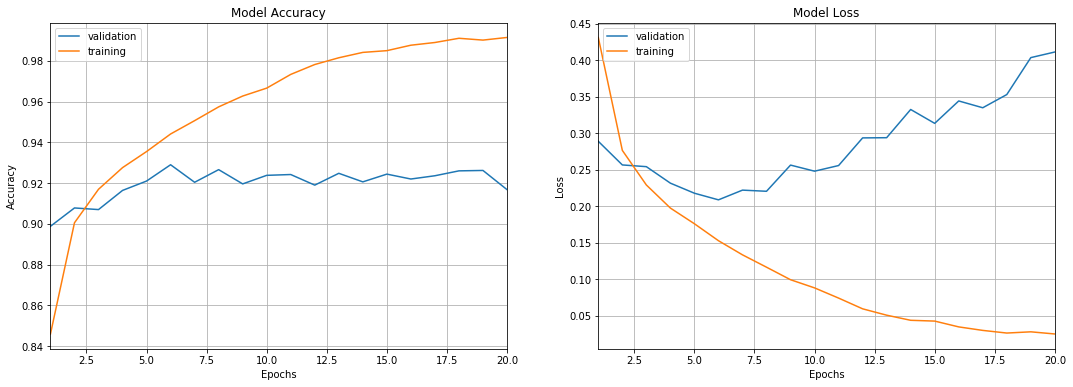

In [6]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs+1),history.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs+1),history.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs+1),history.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs])
plt.grid(True)
plt.title("Model Loss")

plt.show()